# Acronym vs Full-term Differences

In articles, authors will sometimes shorten long term to acronyms. However this can mean that different queries using the acronym or the full term can return different results.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import nilearn as nl
import nibabel as nib
import neuroquery as nq
import pandas as pd
import warnings
import maml._constants as constants

from scipy.stats import pearsonr
from nilearn import datasets, image, input_data
from nilearn.plotting import plot_stat_map, plot_glass_brain
from pathlib import Path
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

## Load the Neuroquery Model

In [20]:
model = nq.NeuroQueryModel.from_data_dir(constants.NEUROQUERY_MODEL_DIR)

## Acronym vs Full Term Comparison

In [21]:
acronym_results = model("ASD")
full_text_results = model("Autism Spectrum Disorder")

## Differences in Similar Documents
Based on whether the acronym or the full term is used, the documents that are scored as the most similar change

In [22]:
acronym_results['similar_documents']

,pmid,title,pubmed_url,similarity
0,20656041,fMRI evidence of neural abnormalities in the s...,https://www.ncbi.nlm.nih.gov/pubmed/20656041,0.734954
1,17707658,Atypical neural substrates of Embedded Figures...,https://www.ncbi.nlm.nih.gov/pubmed/17707658,0.700331
2,21078973,Neural signatures of autism,https://www.ncbi.nlm.nih.gov/pubmed/21078973,0.672206
3,24497750,Atypical Neural Processing of Ironic and Since...,https://www.ncbi.nlm.nih.gov/pubmed/24497750,0.671073
4,19683584,Investigating the predictive value of whole-br...,https://www.ncbi.nlm.nih.gov/pubmed/19683584,0.654941
...,...,...,...,...
95,25352976,The role of mirroring and mentalizing networks...,https://www.ncbi.nlm.nih.gov/pubmed/25352976,0.437427
96,21692142,Brain Structure Anomalies in Autism Spectrum D...,https://www.ncbi.nlm.nih.gov/pubmed/21692142,0.436408
97,20655320,Association between amygdala response to emoti...,https://www.ncbi.nlm.nih.gov/pubmed/20655320,0.435353
98,26484047,Default mode network segregation and social de...,https://www.ncbi.nlm.nih.gov/pubmed/26484047,0.434623


In [23]:
full_text_results['similar_documents']

,pmid,title,pubmed_url,similarity
0,22791801,Fractionation of social brain circuits in auti...,https://www.ncbi.nlm.nih.gov/pubmed/22791801,0.607334
1,20381584,Regional Homogeneity of fMRI Time Series in Au...,https://www.ncbi.nlm.nih.gov/pubmed/20381584,0.516981
2,22101112,A systematic review and meta-analysis of the f...,https://www.ncbi.nlm.nih.gov/pubmed/22101112,0.516332
3,24419870,Autism Spectrum Disorder as Early Neurodevelop...,https://www.ncbi.nlm.nih.gov/pubmed/24419870,0.486376
4,26788282,The effect of gender on the neuroanatomy of ch...,https://www.ncbi.nlm.nih.gov/pubmed/26788282,0.477372
...,...,...,...,...
95,21890111,Multivariate searchlight classification of str...,https://www.ncbi.nlm.nih.gov/pubmed/21890111,0.225614
96,28619530,Neural networks underlying language and social...,https://www.ncbi.nlm.nih.gov/pubmed/28619530,0.223987
97,24133425,Abnormal functional connectivity during visuos...,https://www.ncbi.nlm.nih.gov/pubmed/24133425,0.223980
98,20943668,Decreased Interhemispheric Functional Connecti...,https://www.ncbi.nlm.nih.gov/pubmed/20943668,0.222968


In [24]:
acronym_results['similar_documents']['difference'] = acronym_results['similar_documents']['similarity'] - full_text_results['similar_documents']['similarity']
acronym_results['similar_documents'].sort_values('difference')

,pmid,title,pubmed_url,similarity,difference
0,20656041,fMRI evidence of neural abnormalities in the s...,https://www.ncbi.nlm.nih.gov/pubmed/20656041,0.734954,0.127620
11,18550622,"Response monitoring, repetitive behaviour and ...",https://www.ncbi.nlm.nih.gov/pubmed/18550622,0.589171,0.138235
2,21078973,Neural signatures of autism,https://www.ncbi.nlm.nih.gov/pubmed/21078973,0.672206,0.155874
10,23768913,Differences in global and local level informat...,https://www.ncbi.nlm.nih.gov/pubmed/23768913,0.615649,0.156598
17,27351599,Disentangling the autism−anxiety overlap: fMRI...,https://www.ncbi.nlm.nih.gov/pubmed/27351599,0.574273,0.157285
...,...,...,...,...,...
97,20655320,Association between amygdala response to emoti...,https://www.ncbi.nlm.nih.gov/pubmed/20655320,0.435353,0.211373
99,26526072,Differences in Neural Activity when Processing...,https://www.ncbi.nlm.nih.gov/pubmed/26526072,0.433931,0.211382
98,26484047,Default mode network segregation and social de...,https://www.ncbi.nlm.nih.gov/pubmed/26484047,0.434623,0.211655
95,25352976,The role of mirroring and mentalizing networks...,https://www.ncbi.nlm.nih.gov/pubmed/25352976,0.437427,0.211813


## Similar Words

In [25]:
acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(10)

,similarity,weight_in_brain_map,weight_in_query,n_documents
fusiform,0.000335,0.172484,0.0,4278
motion,0.000407,0.166736,0.0,9061
occipital,0.000233,0.104983,0.0,6796
frontal,0.000337,0.073966,0.0,11471
superior,0.000483,0.070860,0.0,9978
cingulate,0.000154,0.070303,0.0,9501
face,0.000195,0.068161,0.0,4405
temporal,0.000186,0.063670,0.0,11897
fa,0.000197,0.060757,0.0,1796
gamma,0.000677,0.041453,0.0,1755


In [26]:
full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(10)

,similarity,weight_in_brain_map,weight_in_query,n_documents
reward,0.000865,0.203066,0.0,2823
motion,0.000424,0.173782,0.0,9061
occipital,0.000381,0.171976,0.0,6796
fusiform,0.000332,0.171353,0.0,4278
frontal,0.000421,0.092529,0.0,11471
cingulate,0.000193,0.088077,0.0,9501
superior,0.000600,0.088038,0.0,9978
temporal,0.000237,0.081347,0.0,11897
fa,0.000202,0.062050,0.0,1796
reho,0.001097,0.054983,0.0,260


In [27]:
def word_intersection(acronym_results, full_text_results, top_k):
    acronym_top_k = acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(top_k).index.tolist()
    full_text_top_k = full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(top_k).index.tolist()
    return len(set(acronym_top_k).intersection(full_text_top_k))

def word_rank_matches(acronym_results, full_text_results, top_k):
    same_rank = 0
    for i in range(top_k):
        if acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(i).index.tolist() == full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(i).index.tolist():
            same_rank += 1

    return same_rank


for k in [5, 10, 50, 100]:
    print("Top k: {}".format(k))
    print("Word intersection: {}".format(word_intersection(acronym_results, full_text_results, k)))
    print("Word rank matches: {}".format(word_rank_matches(acronym_results, full_text_results, k)))
    print()

Top k: 5
Word intersection: 4
Word rank matches: 1

Top k: 10
Word intersection: 8
Word rank matches: 1

Top k: 50
Word intersection: 35
Word rank matches: 1

Top k: 100
Word intersection: 78
Word rank matches: 1



In [28]:
top_k = 5
acronym_top_k = acronym_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(top_k).index.tolist()
full_text_top_k = full_text_results['similar_words'].sort_values('weight_in_brain_map', ascending=False).head(top_k).index.tolist()

acronym_top_k, full_text_top_k

(['fusiform', 'motion', 'occipital', 'frontal', 'superior'],
 ['reward', 'motion', 'occipital', 'fusiform', 'frontal'])

In [29]:
def word_differences(acronym_results, full_text_results):
    differences = (acronym_results['similar_words'] - full_text_results['similar_words'])
    differences = differences.sort_values('weight_in_brain_map', ascending=False)
    differences = differences['weight_in_brain_map'].dropna()
    return differences[differences != 0]
    
print("Word differences:\n{}".format(word_differences(acronym_results, full_text_results)))

Word differences:
face               0.023146
fusiform           0.001131
finger             0.000302
medial temporal    0.000167
memory             0.000102
                     ...   
parietal          -0.028787
thalamus          -0.029471
default           -0.033832
occipital         -0.066993
reward            -0.203061
Name: weight_in_brain_map, Length: 135, dtype: float64


## Brain Map Slices

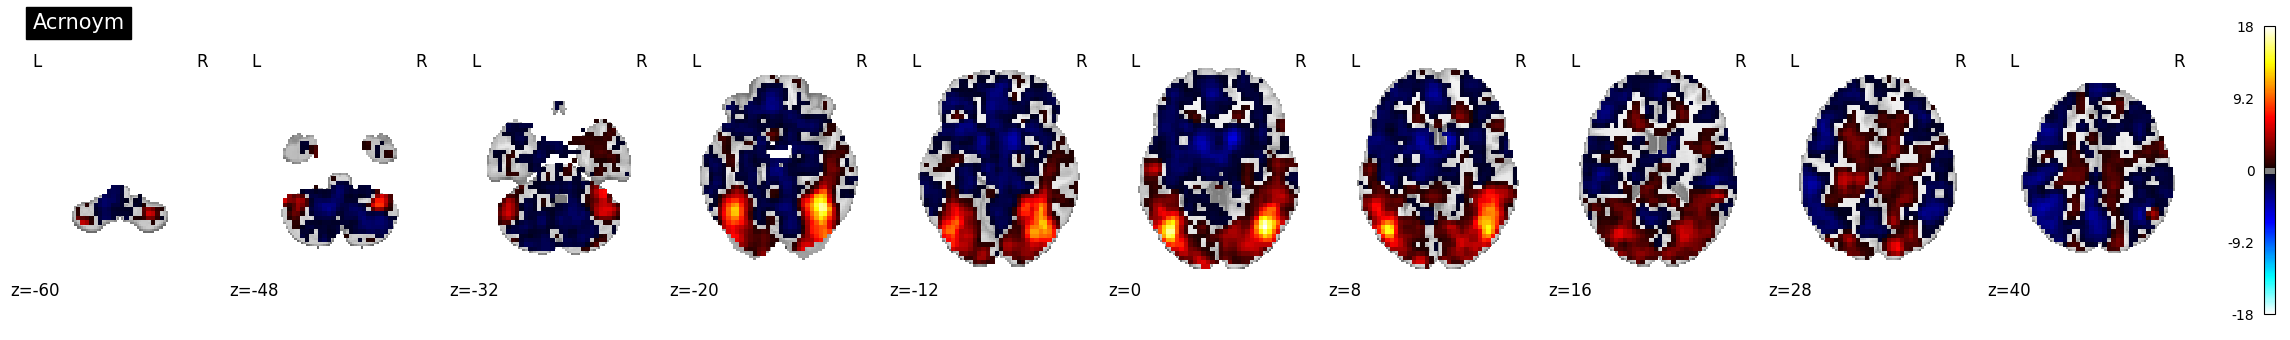

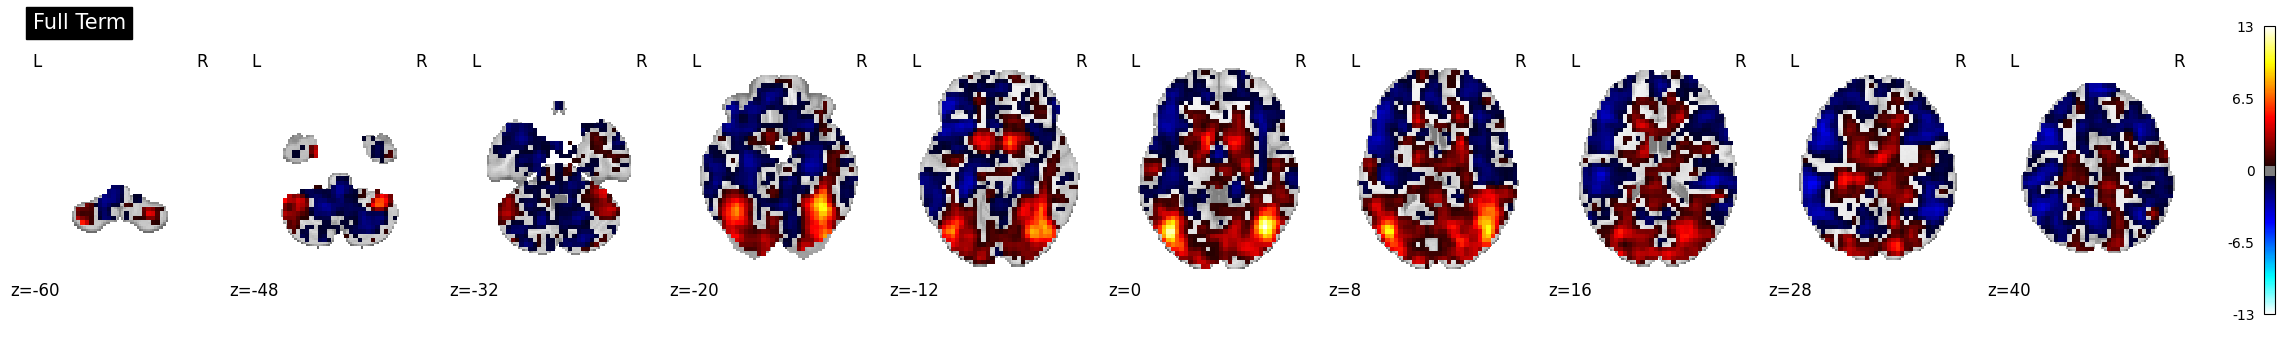

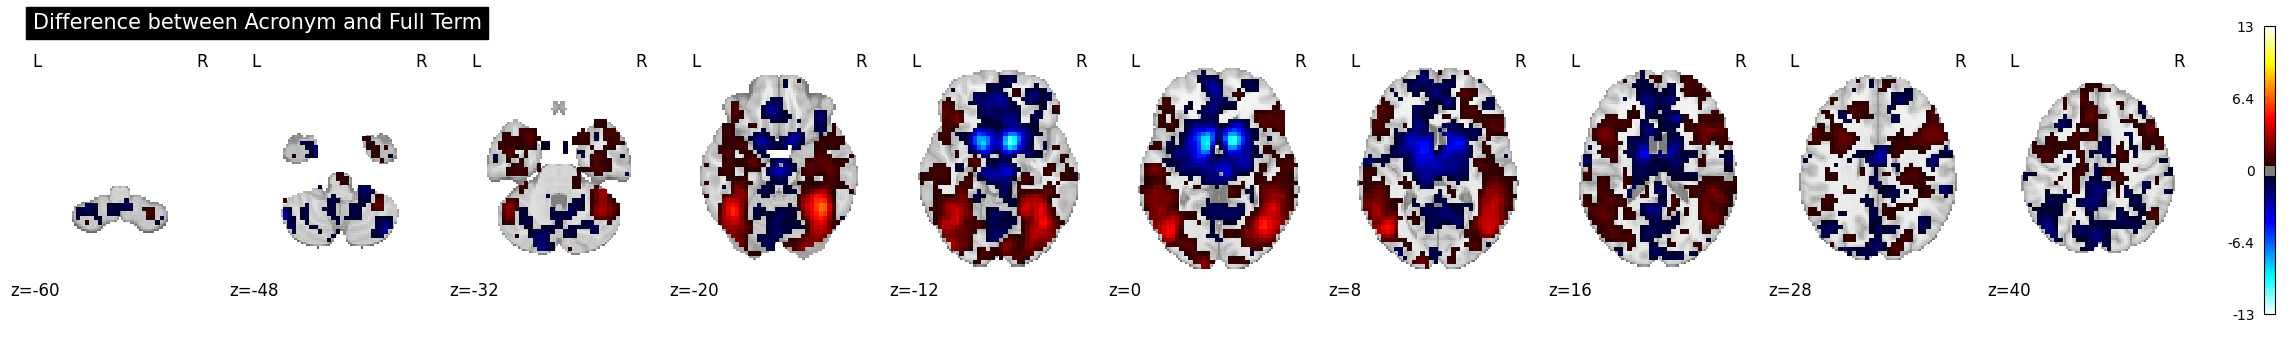

In [30]:
stat_map = plot_stat_map(
    acronym_results["brain_map"],
    threshold=0.5,
    display_mode="z",
    cut_coords=10,
    title="Acrnoym",
)

plot_stat_map(
    full_text_results["brain_map"],
    threshold=0.5,
    display_mode="z",
    cut_coords=stat_map.cut_coords,
    title="Full Term",
)

plot_stat_map(
    nib.Nifti1Image(
        acronym_results["brain_map"].get_fdata() - full_text_results["brain_map"].get_fdata(), 
        affine=acronym_results["brain_map"].affine
    ),
    threshold=0.5,
    display_mode="z",
    cut_coords=stat_map.cut_coords,
    title="Difference between Acronym and Full Term",
)

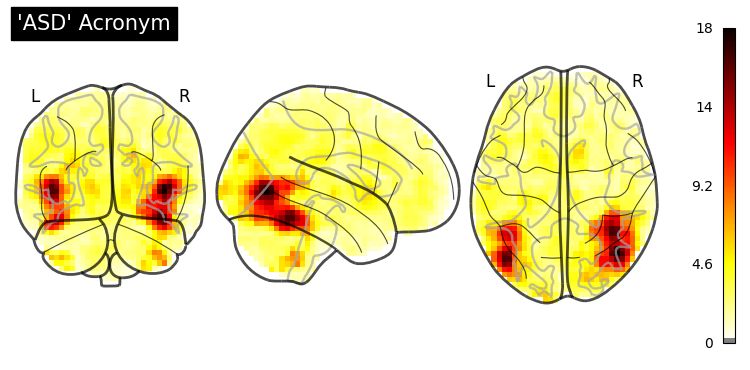

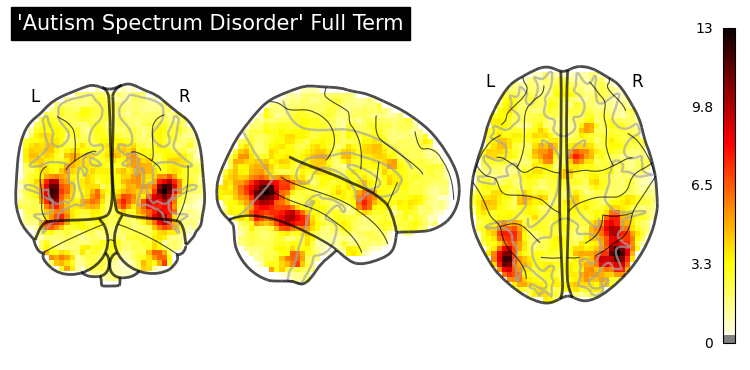

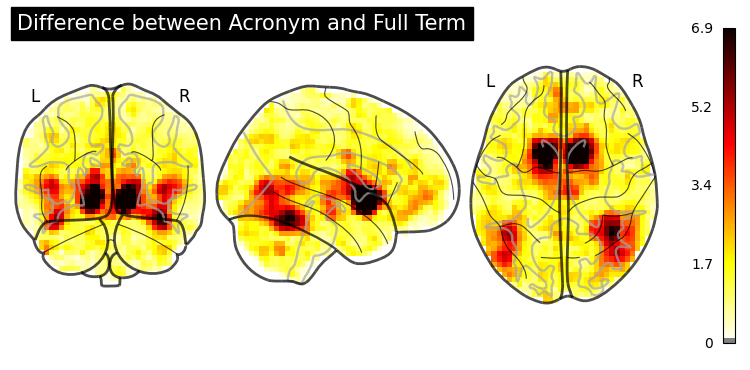

In [62]:

stat_map = plot_glass_brain(
    acronym_results["brain_map"],
    # threshold=0.5,
    colorbar=True,
    title="'ASD' Acronym",
)

plot_glass_brain(
    full_text_results["brain_map"],
    colorbar=True,
    cut_coords=stat_map.cut_coords,
    title="'Autism Spectrum Disorder' Full Term",
)

plot_glass_brain(
    nib.Nifti1Image(
        acronym_results["brain_map"].get_fdata() - full_text_results["brain_map"].get_fdata(), 
        affine=acronym_results["brain_map"].affine
    ),
    colorbar=True,
    cut_coords=stat_map.cut_coords,
    title="Difference between Acronym and Full Term",
)



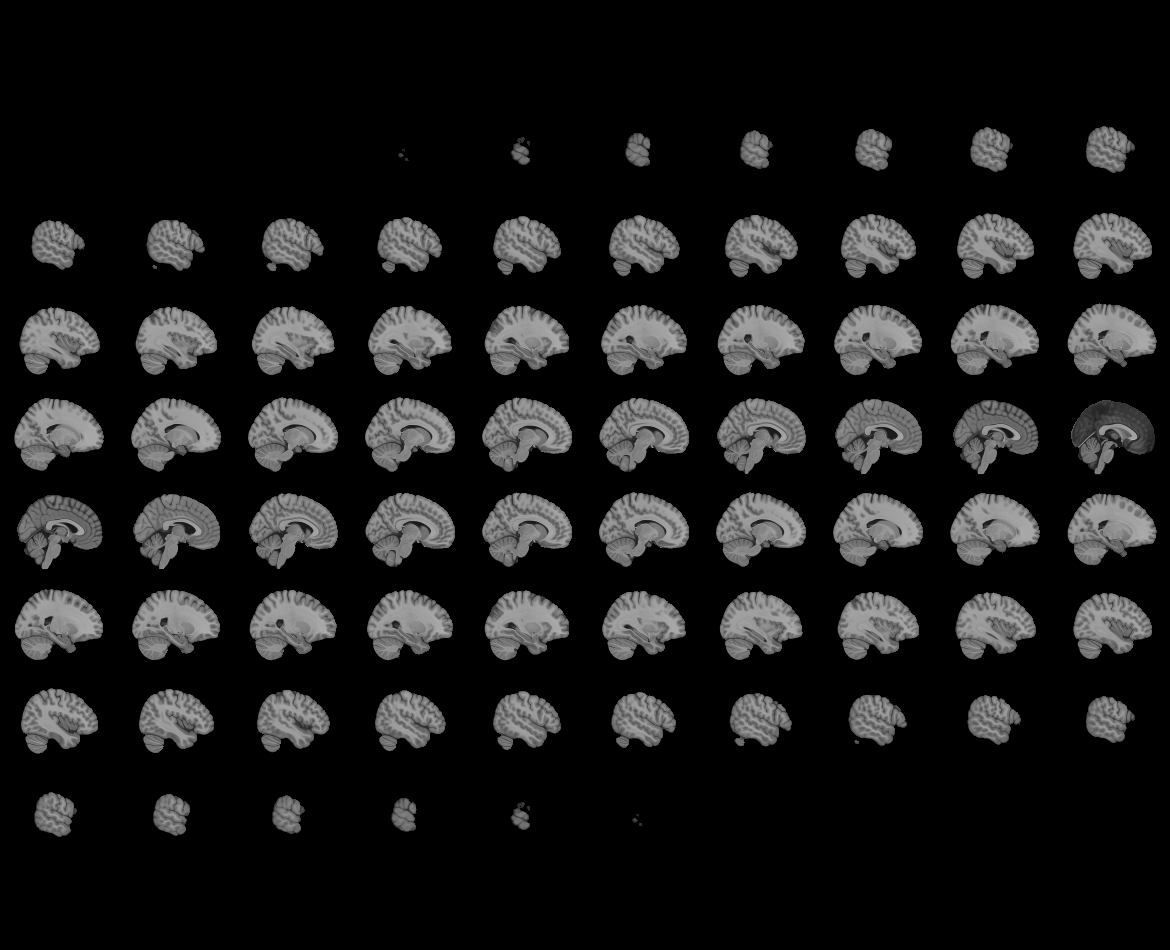
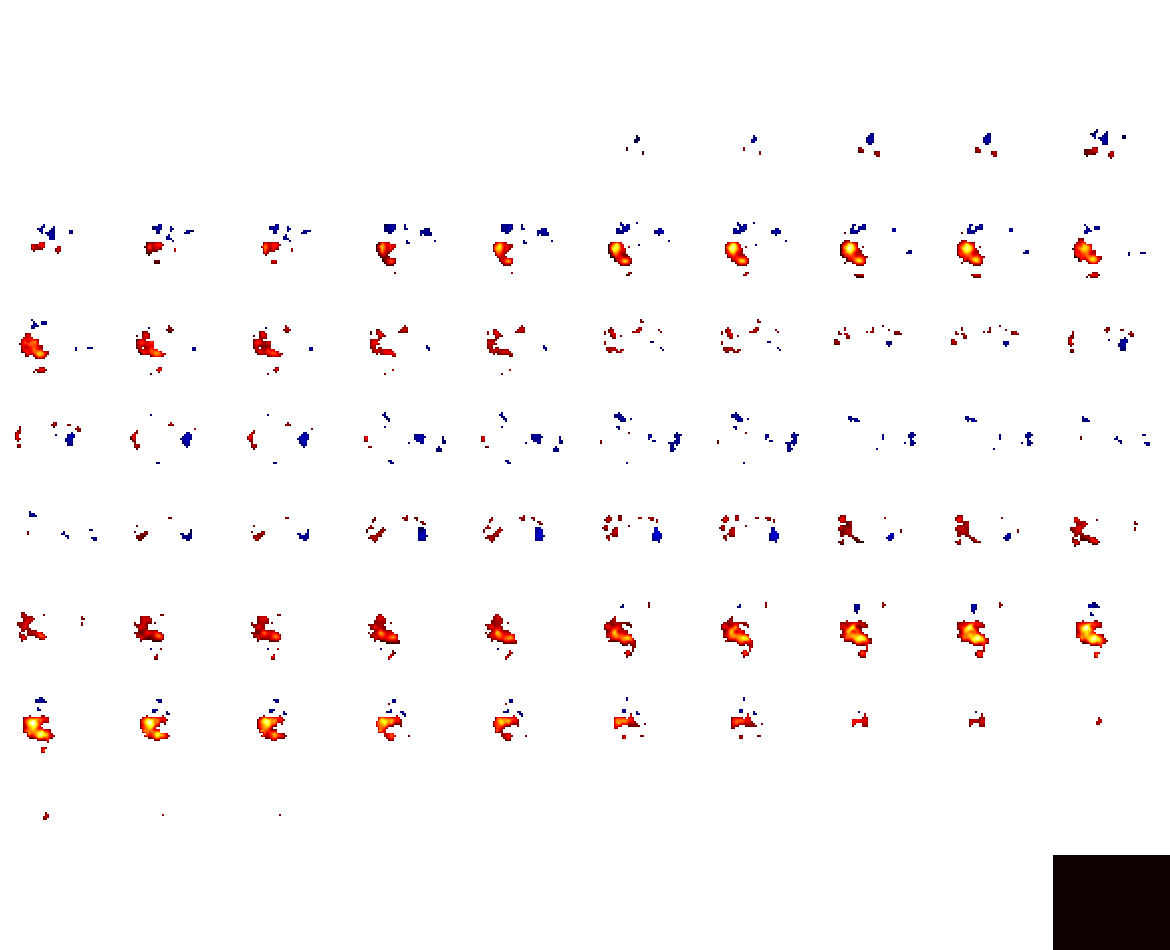


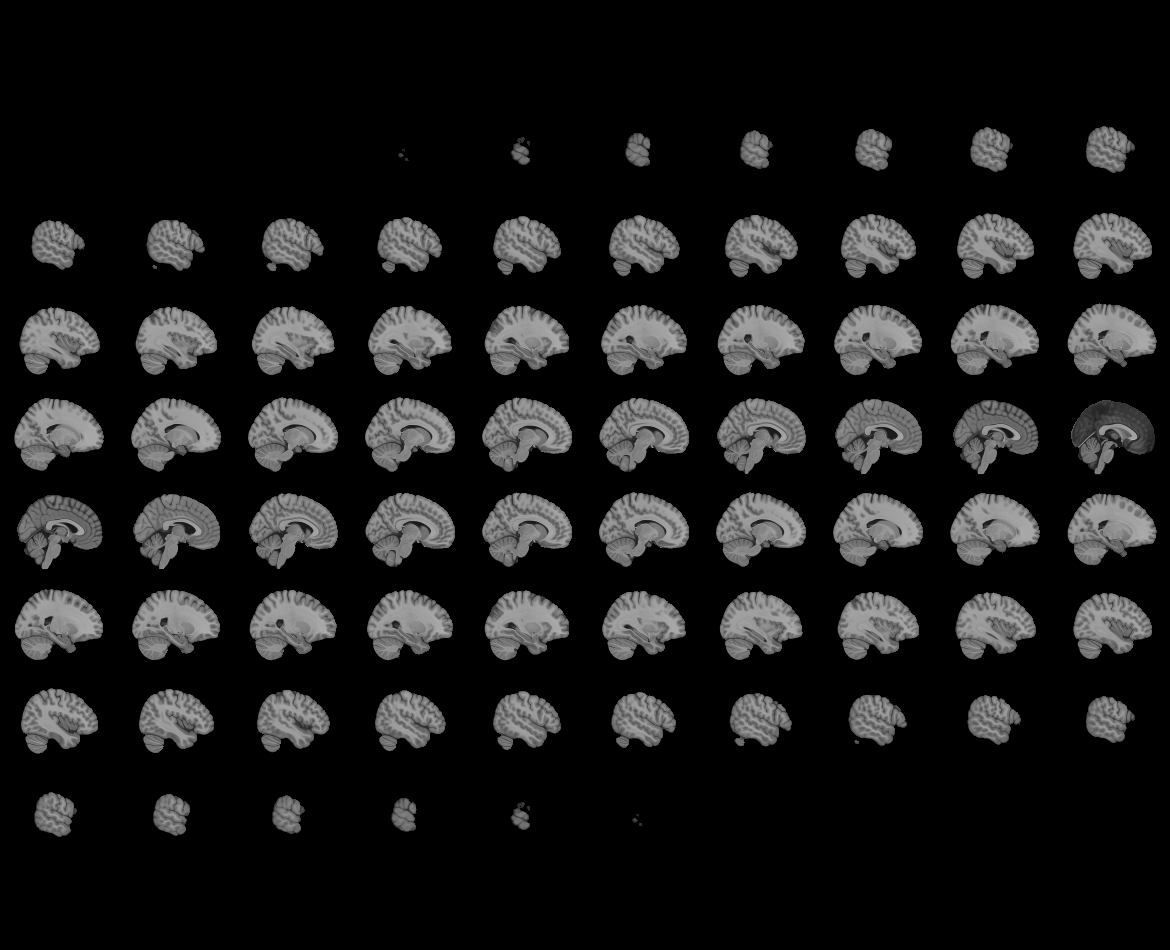
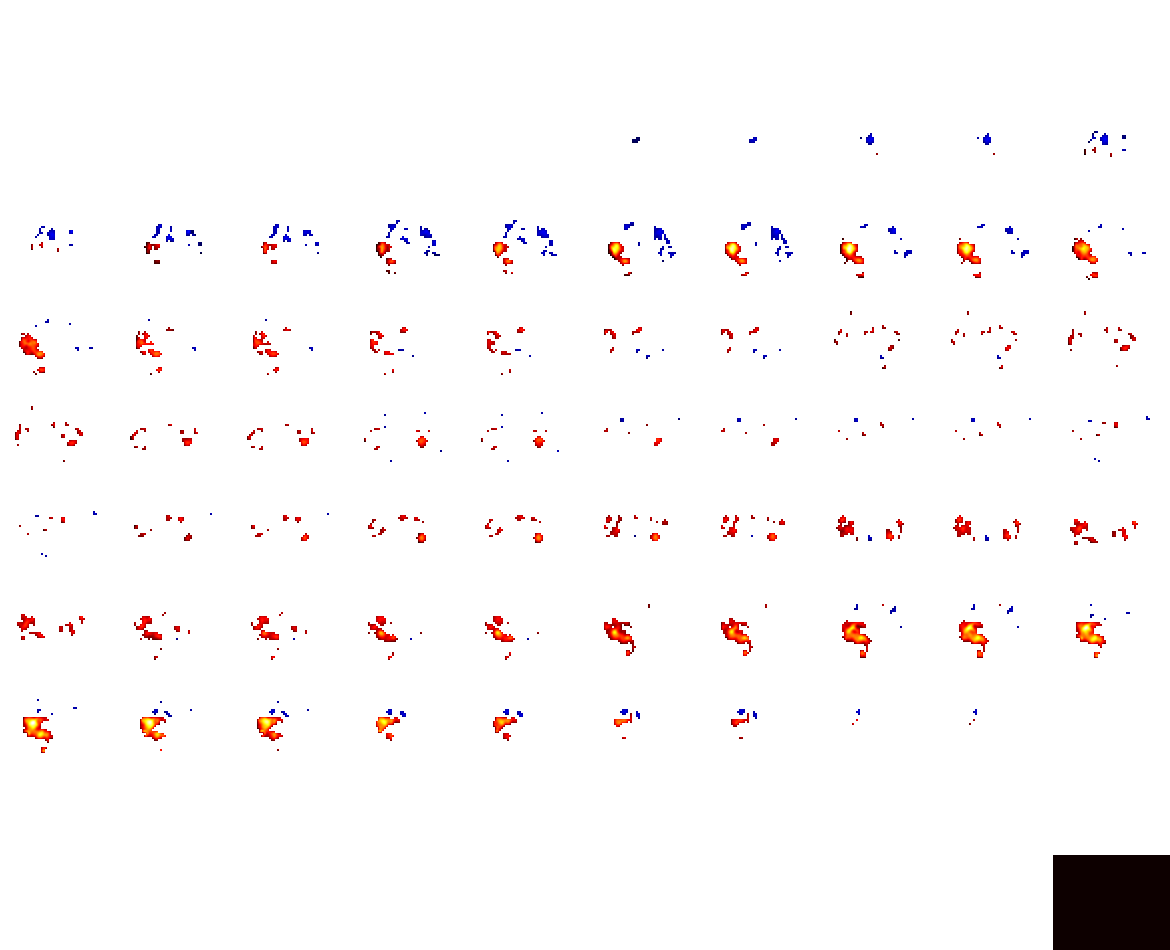


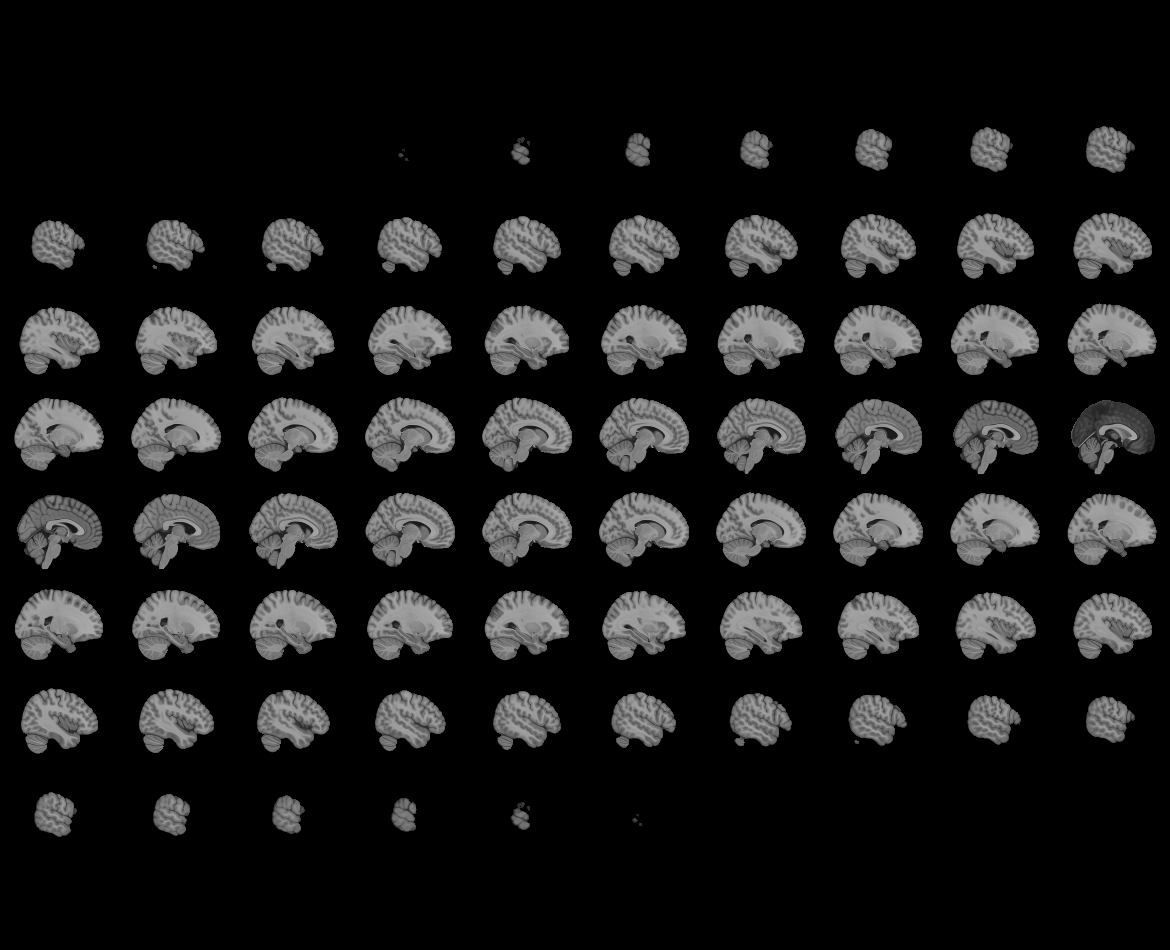
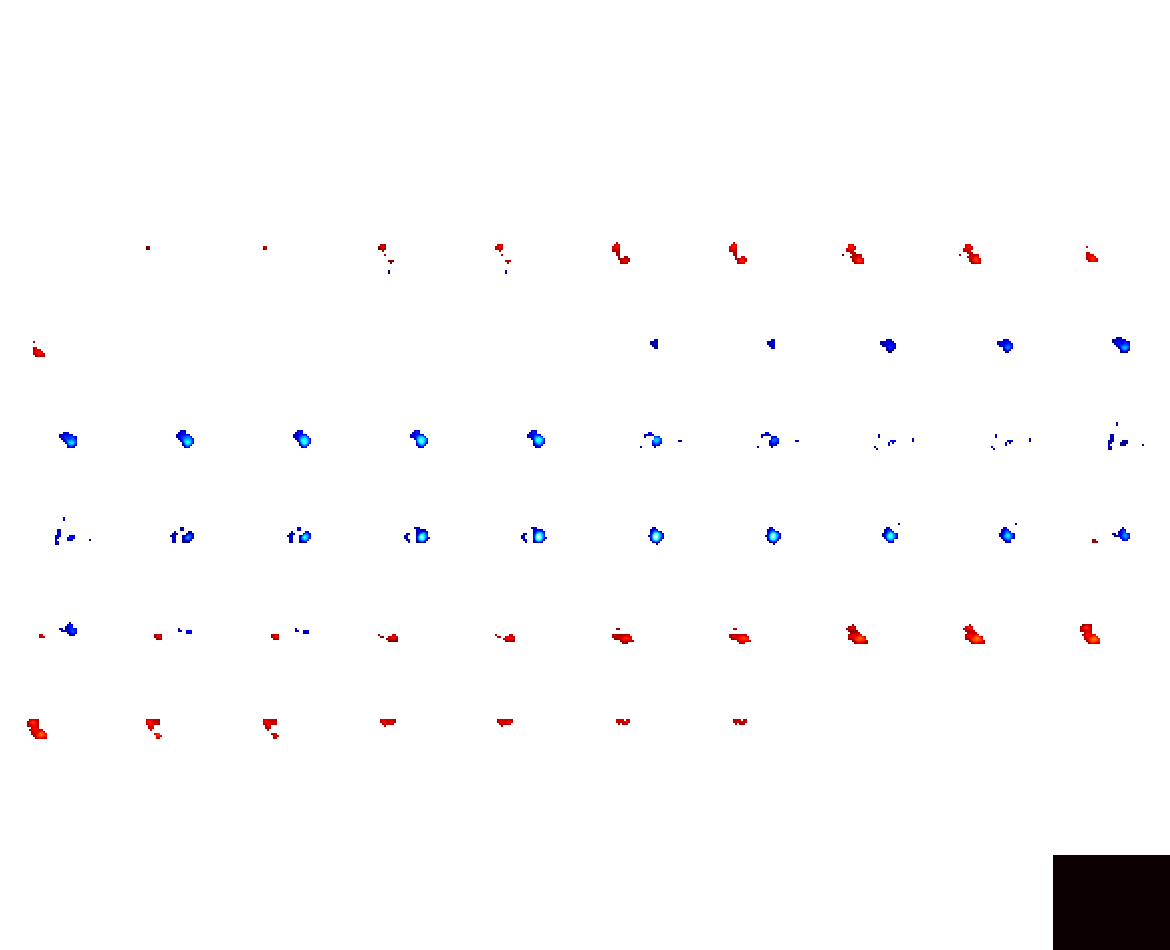

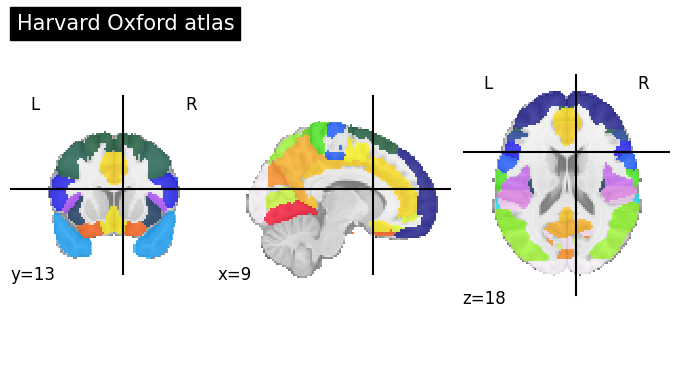

In [73]:
def resample_nifti1_image(img, scale=1/4):
    target_affine = img.affine.copy()
    target_affine[:3, 3] *= scale
    target_affine[:3, -1] /= scale
    return nl.image.resample_img(img, target_affine=target_affine)

def get_optimal_cut(data):
    max_x, max_y, max_z = np.unravel_index(np.argmax(data, axis=None), data.shape)
    return max_x, max_y, max_z
    
acronym_image = acronym_results["brain_map"]
full_text_image = full_text_results["brain_map"]
difference_image = nib.Nifti1Image(
    acronym_image.get_fdata() - full_text_image.get_fdata(), 
    affine=acronym_results["brain_map"].affine
)
data = difference_image.get_fdata() > 3
cut = get_optimal_cut(data)

# Display the Harvard Oxford Atlas First
dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_ho_filename = dataset_ho.filename
plot = nl.plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas", cut_coords=cut)
display(plot)

plot = nl.plotting.view_img(
    resample_nifti1_image(acronym_image, scale=1/4),
    cut_coords=cut,
    threshold=3,
    colorbar=True,
    title="'ASD'"
)
display(plot)

plot = nl.plotting.view_img(
    resample_nifti1_image(full_text_image, scale=1/4),
    cut_coords=cut,
    threshold=3, 
    colorbar=True, 
    title="'Autism Spectrum Disorder'"
)
display(plot)

plot = nl.plotting.view_img(
    resample_nifti1_image(difference_image, scale=1/4),
    cut_coords=cut,
    threshold=3, 
    colorbar=True, 
    title="Difference"
)
display(plot)


## Pearson Correlation

In [33]:
correlation, p_value = pearsonr(acronym_results["brain_map"].get_fdata().flatten(), full_text_results["brain_map"].get_fdata().flatten())
print("Pearson correlation: {:.2f}".format(correlation))
print("p-value: {:.2f}".format(p_value))


Pearson correlation: 0.85
p-value: 0.00


### By Region

In [34]:
# Load the Harvard atlas
harvard_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# Extract region labels and indices
region_labels = harvard_atlas.labels

# Calculate Pearson correlation maps by region
correlation_maps = {}
for region_index, region_label in enumerate(region_labels):
    acronym_image = nl.image.resample_img(acronym_results["brain_map"], target_affine=harvard_atlas.maps.affine).get_fdata()
    full_text_image = nl.image.resample_img(full_text_results["brain_map"], target_affine=harvard_atlas.maps.affine).get_fdata()
    mask = harvard_atlas.maps.get_fdata()

    acronym_region = acronym_image[mask == region_index]
    full_text_region = full_text_image[mask == region_index]
    
    # Calculate the Pearson correlation between the region's mask and the brain maps
    correlation, _ = pearsonr(acronym_region, full_text_region)

    # Store the correlation value
    correlation_maps[region_label] = correlation

# Convert the correlation maps to a Pandas Series
correlation_maps = pd.Series(correlation_maps)


In [35]:
correlation_maps.sort_values(ascending=False)

Temporal Occipital Fusiform Cortex                                     0.983491
Middle Temporal Gyrus, temporooccipital part                           0.981325
Lateral Occipital Cortex, inferior division                            0.977958
Occipital Fusiform Gyrus                                               0.968791
Supramarginal Gyrus, posterior division                                0.964717
Supramarginal Gyrus, anterior division                                 0.960237
Inferior Frontal Gyrus, pars triangularis                              0.956992
Inferior Temporal Gyrus, temporooccipital part                         0.956062
Temporal Fusiform Cortex, posterior division                           0.950438
Planum Temporale                                                       0.948467
Heschl's Gyrus (includes H1 and H2)                                    0.945097
Lateral Occipital Cortex, superior division                            0.943693
Cuneal Cortex                           